## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [41]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **1. Data Exploration and Preprocessing:**

**Load the dataset and conduct basic data exploration.**

In [42]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
df.shape

(32561, 15)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no null values.

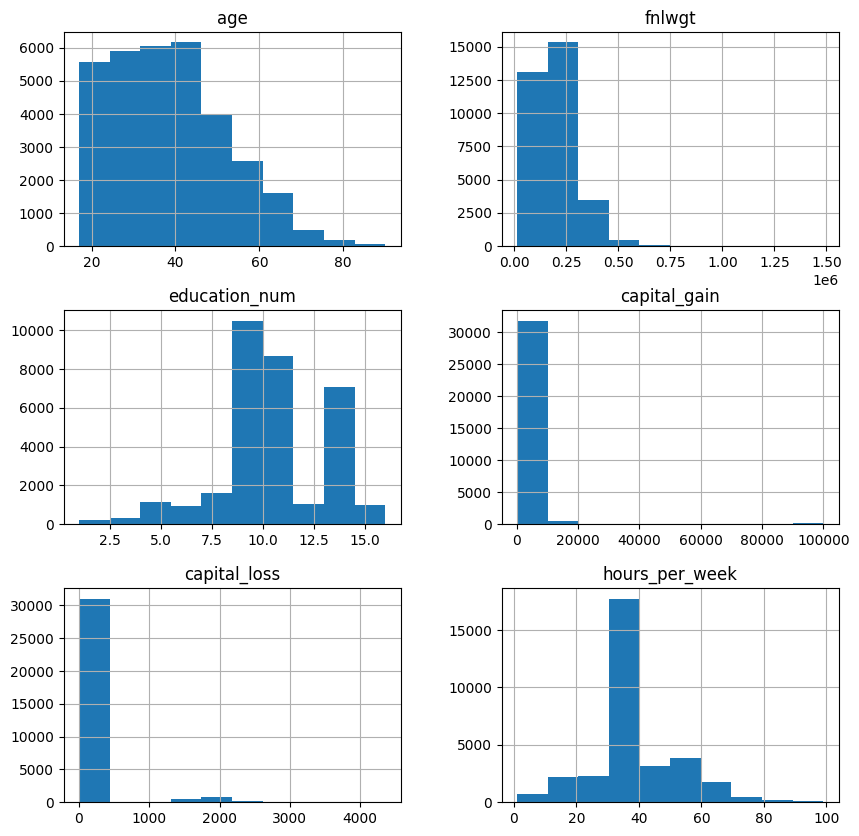

In [47]:
df.hist(figsize=(10,10))
plt.show()

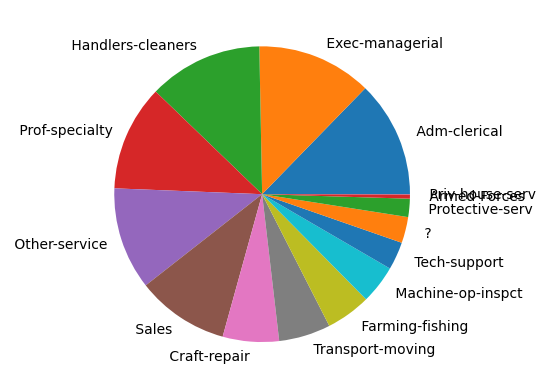

In [48]:
plt.pie(df.occupation.value_counts(), labels=df.occupation.unique())
plt.show()

**Applying scaling techniques to numerical features**

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

df_standard_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


**Standard Scaling:** This technique scales the data to have a mean of 0 and a standard deviation of 1. It is preferred when the data follows a Gaussian distribution. It helps in algorithms that assume the data is normally distributed (e.g., linear regression, logistic regression).

In [50]:
# Min-max scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

df_minmax_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


**Min-Max Scaling:** This technique scales the data to a fixed range, usually 0 to 1. It is preferred when the data does not follow a Gaussian distribution and when the algorithm does not assume any distribution of data (e.g., K-Nearest Neighbors, Neural Networks).

### **2. Encoding Techniques**

**Applying One-Hot Encoding and Label Encoding.** **bold text**

In [51]:
# Identify categorical columns with less than 5 categories
categorical_columns = df.select_dtypes(include=['object']).columns
one_hot_columns = [col for col in categorical_columns if df[col].nunique() < 5]
one_hot_columns

['sex', 'income']

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Apply One-Hot Encoding to categorical variables with less than 5 categories
one_hot_encoder = OneHotEncoder(sparse=False)

df_one_hot_encoded = df.copy()
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))
df_one_hot_encoded = pd.concat([df_one_hot_encoded, one_hot_encoded_df], axis=1)
df_one_hot_encoded.drop(one_hot_columns, axis=1, inplace=True)
df_one_hot_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0.0,1.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0.0,1.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0.0,1.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0.0,1.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1.0,0.0,1.0,0.0


In [53]:
# Apply Label Encoding to categorical variables with more than 5 categories
label_encoder = LabelEncoder()
label_columns = [col for col in categorical_columns if df[col].nunique() >= 5]

df_label_encoded = df_one_hot_encoded.copy()
for col in label_columns:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

# Display the first few rows of encoded dataset
df_label_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0


**Discussion:**

**One-Hot Encoding:**
Captures all unique categories without imposing any ordinal relationship. Useful for algorithms that do not assume order among categories.However it increases the dimensionality of the data, especially if the categorical variable has many unique values.

**Label Encoding:**
It does not increase dimensionality and it's Simple and straightforward. But it imposes an ordinal relationship among categories, which may not be desirable for certain categorical variables.

### **Feature Engineering**

**Creating new features.**

We'll create two new features: age_bin and hours_per_week_bin to represent binned versions of age and hours-per-week.

**age_bin:** Converting the age into categories can help the model understand the age groups and their impact on income.<br>
**hours_per_week_bin:** Hours worked per week can help the model capture the workload categories and their relationship with income.

In [54]:
# Create age_bin feature
df_label_encoded['age_bin'] = pd.cut(df_label_encoded['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Senior', 'Old'])

# Create hours_per_week_bin feature
df_label_encoded['hours_per_week_bin'] = pd.cut(df_label_encoded['hours_per_week'], bins=[0, 25, 40, 60, 100], labels=['Part-time', 'Full-time', 'Over-time', 'Excessive'])

# Display the first few rows of the dataset with new features
df_label_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bin,hours_per_week_bin
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0,Senior,Part-time
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0,Senior,Full-time
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0,Adult,Full-time


**Applying transformation to a skewed numerical feature.**

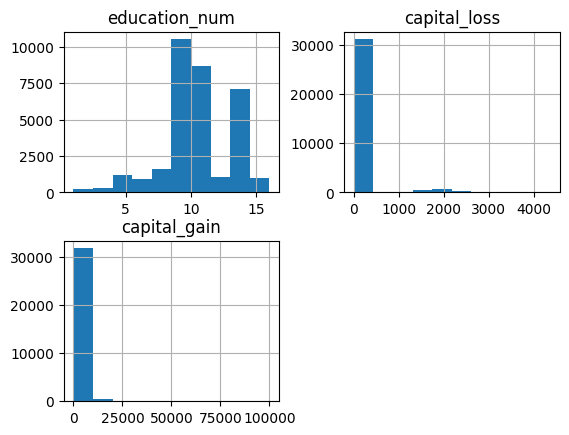

In [55]:
df_label_encoded[['education_num', 'capital_loss', 'capital_gain']].hist()
plt.show()

We'll apply a log transformation to the education_num, capital_gain and capital_loss features due to thier skewed distributions.

Log transformation is useful for reducing skewness and stabilizing variance. It helps in cases where the data has a long tail and can make the feature distribution more Gaussian-like.

In [56]:
# Apply log transformation to capital-gain
df_label_encoded[['education_num', 'capital_gain','capital_loss']] = df_label_encoded[['education_num', 'capital_gain','capital_loss']].apply(lambda x: np.log(x + 1))

# Display the first few rows of the dataset with transformed feature
df_label_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bin,hours_per_week_bin
0,39,7,77516,9,2.639057,4,1,1,4,7.684784,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
1,50,6,83311,9,2.639057,2,4,0,4,0.000000,0.0,13,39,0.0,1.0,1.0,0.0,Senior,Part-time
2,38,4,215646,11,2.302585,0,6,1,4,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
3,53,4,234721,1,2.079442,2,6,0,2,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Senior,Full-time
4,28,4,338409,9,2.639057,2,10,5,2,0.000000,0.0,40,5,1.0,0.0,1.0,0.0,Adult,Full-time


### **Feature Selection**

**Using Isolation Forest to identify and remove outliers.**

In [57]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(df_label_encoded[numerical_features])

# Add the outlier predictions to the dataset
df_label_encoded['outliers'] = outliers
df_label_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bin,hours_per_week_bin,outliers
0,39,7,77516,9,2.639057,4,1,1,4,7.684784,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time,1
1,50,6,83311,9,2.639057,2,4,0,4,0.000000,0.0,13,39,0.0,1.0,1.0,0.0,Senior,Part-time,1
2,38,4,215646,11,2.302585,0,6,1,4,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time,1
3,53,4,234721,1,2.079442,2,6,0,2,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Senior,Full-time,1
4,28,4,338409,9,2.639057,2,10,5,2,0.000000,0.0,40,5,1.0,0.0,1.0,0.0,Adult,Full-time,1


In [58]:
# Remove outliers
df_no_outliers = df_label_encoded[df_label_encoded['outliers'] == 1]
df_no_outliers.drop('outliers', axis=1, inplace=True)

df_no_outliers.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bin,hours_per_week_bin
0,39,7,77516,9,2.639057,4,1,1,4,7.684784,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
1,50,6,83311,9,2.639057,2,4,0,4,0.000000,0.0,13,39,0.0,1.0,1.0,0.0,Senior,Part-time
2,38,4,215646,11,2.302585,0,6,1,4,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Adult,Full-time
3,53,4,234721,1,2.079442,2,6,0,2,0.000000,0.0,40,39,0.0,1.0,1.0,0.0,Senior,Full-time
4,28,4,338409,9,2.639057,2,10,5,2,0.000000,0.0,40,5,1.0,0.0,1.0,0.0,Adult,Full-time


In [59]:
df_no_outliers.shape

(30933, 19)

Outliers can significantly affect model performance in several ways:

**Skewed Model Training:** Outliers can distort the training process by introducing noise, leading to inaccurate model parameters. This can result in overfitting or underfitting.

**Reduced Model Accuracy:** Outliers can negatively impact the accuracy of the model's predictions by pulling the decision boundary towards them, which can degrade the model's overall performance.

**Bias in Metrics:** Outliers can disproportionately influence performance metrics like mean squared error (MSE) and mean absolute error (MAE), making them less reliable indicators of model performance.

**Increased Complexity:** To accommodate outliers, models may become unnecessarily complex, which can reduce interpretability and increase the risk of overfitting.

**Unstable Model Behavior:** Models, especially sensitive ones like linear regression, can become unstable and highly sensitive to small changes in the data due to the presence of outliers.

**Applying PPS (Predictive Power Score) to find relationships between features**

In [60]:
pip install ppscore

In [61]:
import ppscore as pps

# Calculate PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

# Filter PPS matrix to only show the important columns
pps_matrix_filtered = pps_matrix[['x', 'y', 'ppscore']]

# Display the PPS matrix
pps_matrix_filtered

,x,y,ppscore
0,age,age,1.000000
1,age,workclass,0.000000
2,age,fnlwgt,0.000000
3,age,education,0.000000
4,age,education_num,0.000000
...,...,...,...
356,hours_per_week_bin,sex_ Male,0.000000
357,hours_per_week_bin,income_ <=50K,0.000000
358,hours_per_week_bin,income_ >50K,0.000000
359,hours_per_week_bin,age_bin,0.087816


In [62]:
# Display the PPS matrix with sorted
pps_matrix_filtered_sorted = pps_matrix_filtered.sort_values(by='ppscore', ascending=False)
pps_matrix_filtered_sorted.head(30)

,x,y,ppscore
0,age,age,1.000000
240,native_country,native_country,1.000000
80,education_num,education_num,1.000000
100,marital_status,marital_status,1.000000
120,occupation,occupation,1.000000
140,relationship,relationship,1.000000
160,race,race,1.000000
200,capital_loss,capital_loss,1.000000
220,hours_per_week,hours_per_week,1.000000
227,hours_per_week,hours_per_week_bin,1.000000


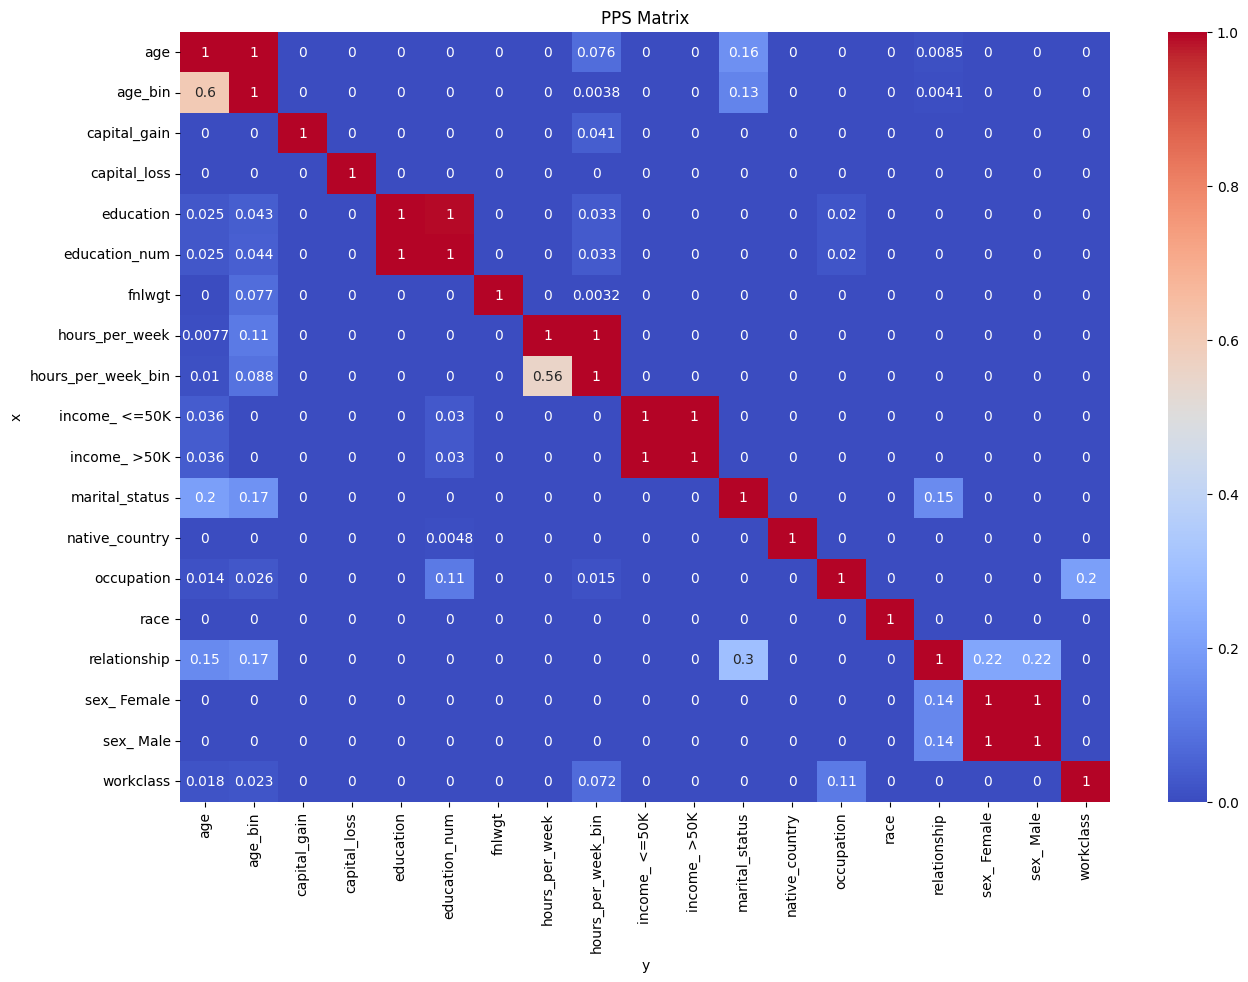

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(pps_matrix.pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')
plt.show()

In [64]:
# Calculate correlation matrix
correlation_matrix = df_no_outliers.corr()

# Display the correlation matrix
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
age,1.000000,0.010546,-0.079114,-0.000723,0.014253,-0.284741,-0.017299,-0.260775,0.026446,0.087461,0.027426,0.090356,0.002085,-0.085420,0.085420,-0.234403,0.234403
workclass,0.010546,1.000000,-0.016223,0.018713,0.040526,-0.061420,0.247461,-0.090606,0.049344,0.020104,-0.004517,0.130409,-0.005005,-0.093754,0.093754,-0.040608,0.040608
fnlwgt,-0.079114,-0.016223,1.000000,-0.024634,-0.045143,0.028769,-0.000577,0.009372,-0.024437,-0.024217,-0.012887,-0.019744,-0.050343,-0.025971,0.025971,0.015931,-0.015931
education,-0.000723,0.018713,-0.024634,1.000000,0.413294,-0.034540,-0.025945,-0.010997,0.013581,0.028563,0.028372,0.052840,0.061825,0.028280,-0.028280,-0.072646,0.072646
education_num,0.014253,0.040526,-0.045143,0.413294,1.000000,-0.054464,0.084024,-0.071127,0.026867,0.110320,0.041455,0.117949,0.084063,0.004841,-0.004841,-0.279771,0.279771
marital_status,-0.284741,-0.061420,0.028769,-0.034540,-0.054464,1.000000,-0.006398,0.182796,-0.067258,-0.063156,-0.039408,-0.190839,-0.023582,0.122490,-0.122490,0.195488,-0.195488
occupation,-0.017299,0.247461,-0.000577,-0.025945,0.084024,-0.006398,1.000000,-0.076568,0.007717,0.018586,0.007525,0.072965,-0.012566,-0.081921,0.081921,-0.071091,0.071091
relationship,-0.260775,-0.090606,0.009372,-0.010997,-0.071127,0.182796,-0.076568,1.000000,-0.118563,-0.069797,-0.035584,-0.249527,-0.006855,0.579024,-0.579024,0.243169,-0.243169
race,0.026446,0.049344,-0.024437,0.013581,0.026867,-0.067258,0.007717,-0.118563,1.000000,0.020320,0.017528,0.044576,0.134791,-0.088105,0.088105,-0.071371,0.071371
capital_gain,0.087461,0.020104,-0.024217,0.028563,0.110320,-0.063156,0.018586,-0.069797,0.020320,1.000000,-0.039960,0.069520,0.010274,-0.058932,0.058932,-0.271369,0.271369


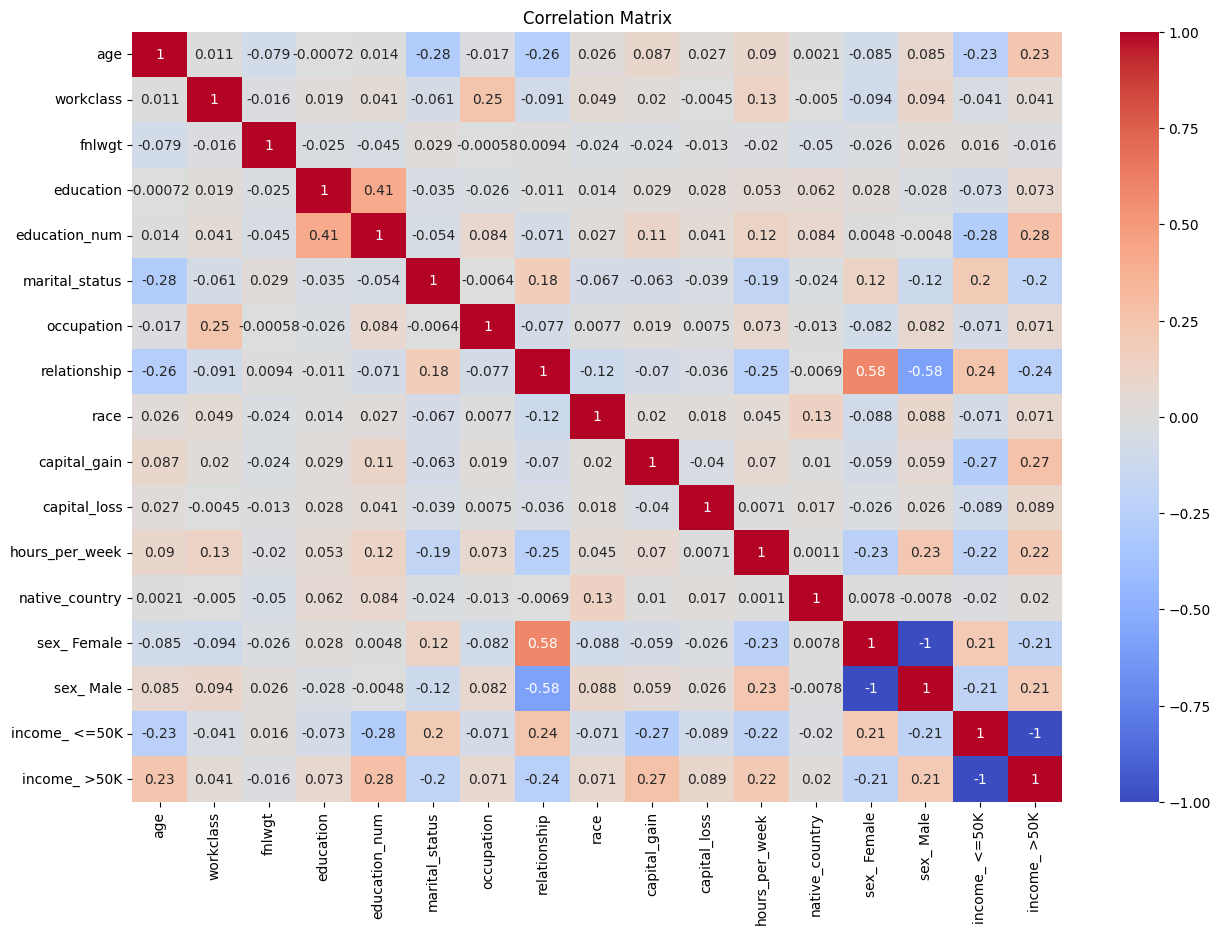

In [65]:
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Comparing PPS (Predictive Power Score) with Correlation Matrix
**Predictive Power Score (PPS)**<br>
PPS measures the predictive power of one feature on another, capturing both linear and non-linear relationships. A PPS value ranges from 0 to 1, where:


*   0 indicates no predictive power.
*   1 indicates perfect predictive power.


The provided PPS results show strong predictive relationships (PPS = 1.0) within the same feature (e.g., age with age, education_num with education_num). There are also some notable cross-feature predictive powers like education and education_num (0.995), age and age_bin (0.602), and hours_per_week and hours_per_week_bin (0.556).

**Correlation Matrix**<br>
Correlation measures the linear relationship between two features. A correlation value ranges from -1 to 1, where:


*   1 indicates a perfect positive linear relationship.
*   -1 indicates a perfect negative linear relationship.
*   0 indicates no linear relationship.

The provided top correlation results highlight both positive and negative relationships:

*   Strong negative correlation between sex_Male and sex_Female (-1).
*   Strong negative correlation between income_ >50K and income_ <=50K (-1).
*   Moderate correlations between sex and relationship (positive for sex_Female and negative for sex_Male).

**Comparison and Analysis**<br>

**Same Feature Relationships (PPS):**<br>
PPS values of 1.0 for the same feature (e.g., age with age) confirm that each feature perfectly predicts itself, which is expected and consistent with the correlation matrix showing a value of 1.0 for these pairs.

**Cross Feature Relationships:**<br>


*   Education and Education_num: High PPS values (0.998 and 0.995) indicate strong predictive power between education and education_num. The correlation value is also relatively high (0.41), showing a positive linear relationship.
*   Age and Age_bin: PPS value of 0.602 indicates that age has a moderate predictive power on age_bin, capturing the non-linear aspect of converting age into bins. This type of relationship isn't directly reflected in the correlation matrix as it involves categorization.
*   Hours_per_week and Hours_per_week_bin: PPS value of 0.556 indicates moderate predictive power, reflecting the binning of continuous hours into categories. Similar to age_bin, this relationship is not well-represented by linear correlation.


**Non-linear Relationships:**

Relationship and Marital_status: PPS of 0.302 shows some predictive power, indicating a non-linear relationship which the correlation matrix might not fully capture (not listed in top correlations but expected to be low).

**Correlations not in PPS:**

The correlation matrix shows some strong relationships not highlighted by PPS, such as sex_Male with relationship (-0.58) and sex_Female with relationship (0.58). These might indicate linear relationships which PPS does not consider as strong non-linear predictors.

### Summary of Findings


*   Complementary Metrics: PPS and correlation are complementary. While correlation captures linear relationships, PPS captures both linear and non-linear relationships.
*   High Agreement in Predictive Relationships: Features like education and education_num have high values in both PPS and correlation, indicating strong linear relationships.
*   Non-linear Insights from PPS: Relationships like age with age_bin and hours_per_week with hours_per_week_bin are better captured by PPS, highlighting the advantage of PPS in identifying predictive power in non-linear transformations.
*   Unique Linear Relationships in Correlation: Some strong linear relationships (e.g., sex with relationship) are more evident in the correlation matrix.

Both tools are useful for feature selection and understanding data relationships, with PPS providing additional insights into non-linear predictive relationships that might be missed by traditional correlation analysis.






